# **Summary of the Assignment**
In this Case Study I'm performing Exploratory Analysis & Visualization of the Framingham-Heart-Study Dataset. My main objective with this work is to understand the trends of Systolic Blood Pressure levels. The Systolic Blood Pressure, measures the pressure in your arteries when your heart beats

# **Motivation**
The Framingham Heart Study is a long term prospective study of the etiology of cardiovascular disease among a population of free living subjects in the community of Framingham, Massachusetts. The Framingham Heart Study was a landmark study in epidemiology in that it was the first prospective study of cardiovascular disease and identified the concept of risk factors and their joint effects FHS Longitudinal Data Document.

# **Description of the Dataset**
The Framingham Heart Study dataset is an unparalleled source of information on cardiovascular health. By exploring it, scientists have the opportunity to identify patterns, risk factors and trends that can save lives. Each analysis is a step forward in the fight against heart disease, providing concrete insights to improve global health. This data set represents an invaluable opportunity to drive research that transforms the prevention and treatment of heart disease, positively impacting the lives of millions of people around the world.

The dataset is a rather small subset of possible FHS dataset, having 4240 observations and 16 variables. The variables are as follows:

* sex : the gender of the observations. The variable is a binary named “male” in the dataset.
* age : Age at the time of medical examination in years.
* education : A categorical variable of the participants education, with the levels: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)
* currentSmoker: Current cigarette smoking at the time of examinations
* cigsPerDay: Number of cigarettes smoked each day
* BPmeds: Use of Anti-hypertensive medication at exam
* prevalentStroke: Prevalent Stroke (0 = free of disease)
* prevalentHyp: Prevalent Hypertensive. Subject was defined as hypertensive if treated
* diabetes: Diabetic according to criteria of first exam treated
* totChol: Total cholesterol (mg/dL)
* sysBP: Systolic Blood Pressure (mmHg)
* diaBP: Diastolic blood pressure (mmHg)
* MI: Body Mass Index, weight (kg)/height (m)^2
* heartRate: Heart rate (beats/minute)
* glucose: Blood glucose level (mg/dL)
* TenYearCHD : The 10 year risk of coronary heart disease(CHD)


# **Libraries**

In [86]:
# Here I import all the libraries that will be used in the Notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from bokeh.plotting import figure, output_notebook,output_file, show
from bokeh.models import ColumnDataSource, Select, CustomJS
from bokeh.layouts import column
import pandas as pd

# **Data Cleaninig**

In [87]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [88]:
ls "/gdrive/My Drive/Introduction to Business Analytics/Intro-to-Data-Analytics-main/Assigment 3"

Framingham.csv


In [89]:
df = pd.read_csv("/gdrive/My Drive/Introduction to Business Analytics/Intro-to-Data-Analytics-main/Assigment 3/Framingham.csv")

In [90]:
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [91]:
# The Dataset contains 4240 observations, and 16 columns/variables
df.shape

(4240, 16)

In [92]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [93]:
# There are some missing values detected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


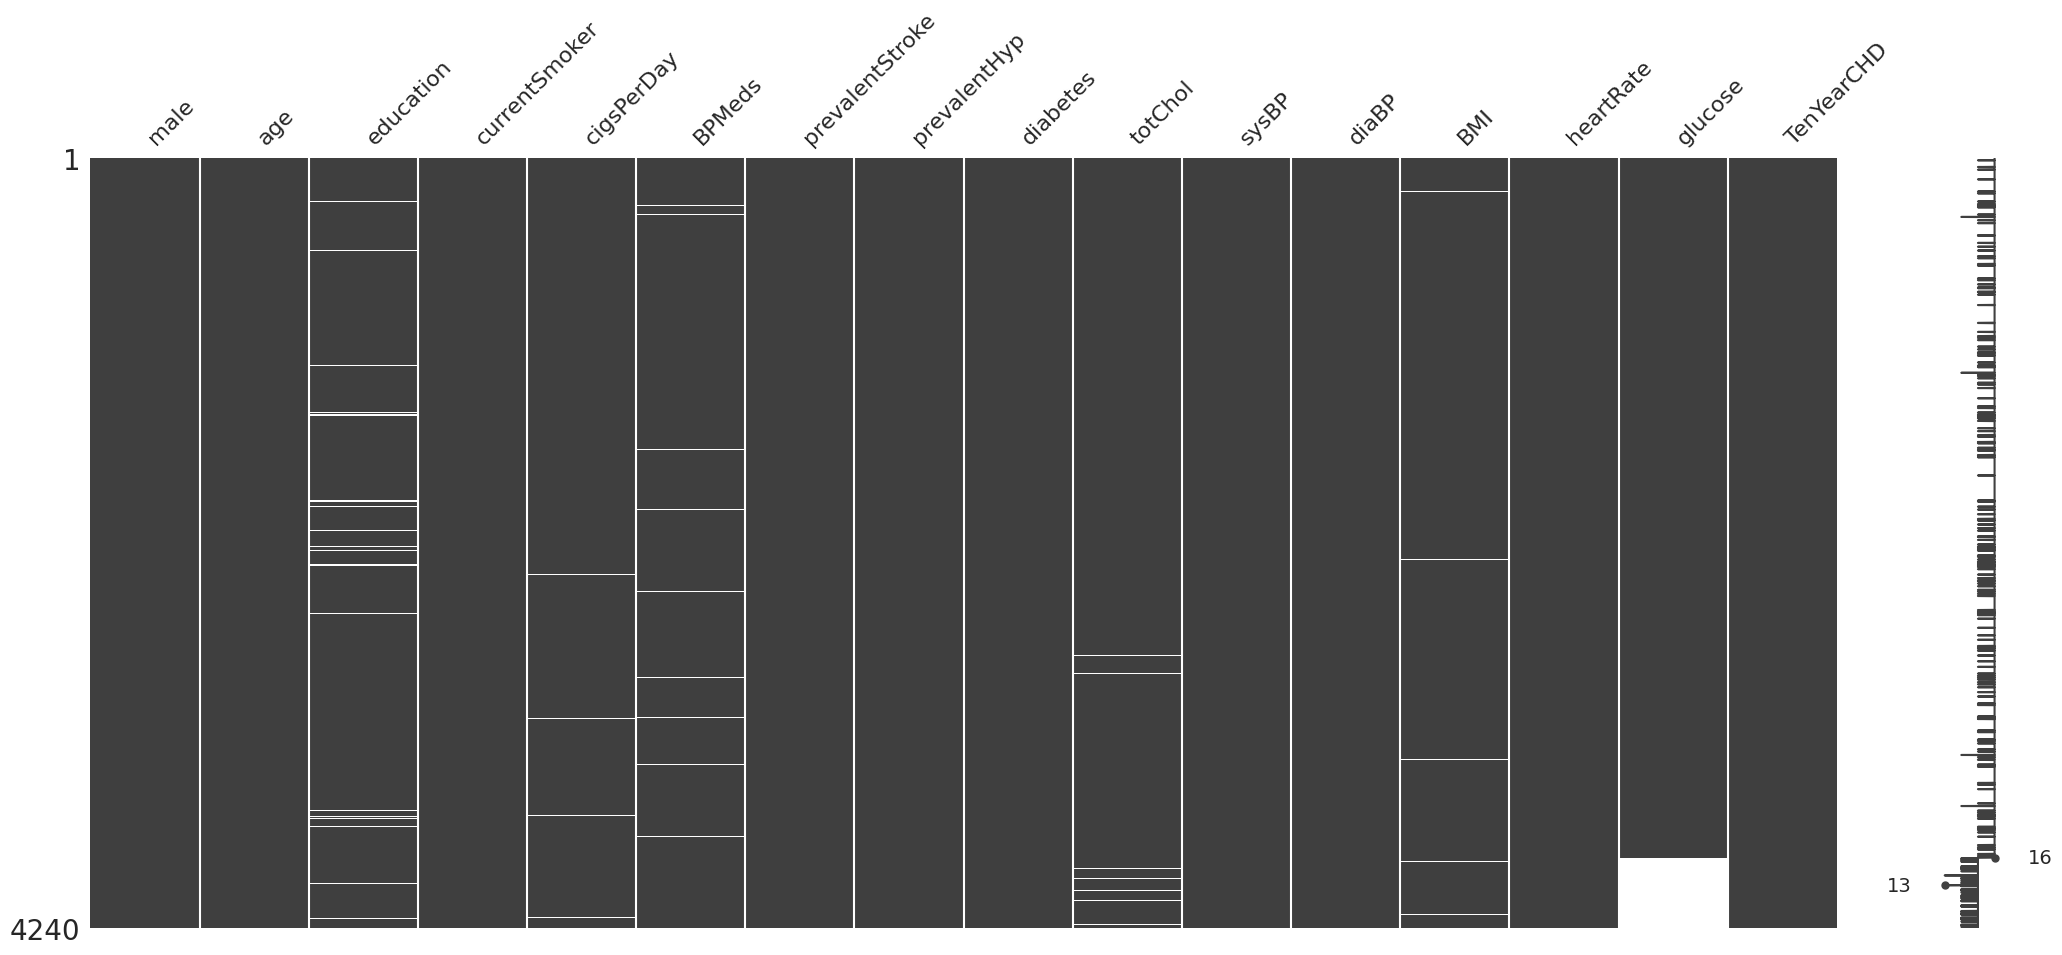

In [94]:
# I can not identify any relation between the missing values, taking glucose as reference because is the variable with the highest number of NaN values
sorted_df=df.sort_values(by="glucose")
msno.matrix(sorted_df)
plt.show()

In [95]:
# Here I calculate the percentage of missing values for every variable in the DataFrame. I notice that dropping data is not an option because it would reduce the obsevation in ~10%
variables = df.columns.to_list()
pct_nul = []
for i in variables:
  pct_nul = (1-(df[i].isnull().value_counts()[False]/(df.shape[0])))*100
  print("The variable "+i+" has "+str(round(pct_nul,2))+ "% of missing values")

The variable male has 0.0% of missing values
The variable age has 0.0% of missing values
The variable education has 2.48% of missing values
The variable currentSmoker has 0.0% of missing values
The variable cigsPerDay has 0.68% of missing values
The variable BPMeds has 1.25% of missing values
The variable prevalentStroke has 0.0% of missing values
The variable prevalentHyp has 0.0% of missing values
The variable diabetes has 0.0% of missing values
The variable totChol has 1.18% of missing values
The variable sysBP has 0.0% of missing values
The variable diaBP has 0.0% of missing values
The variable BMI has 0.45% of missing values
The variable heartRate has 0.02% of missing values
The variable glucose has 9.15% of missing values
The variable TenYearCHD has 0.0% of missing values


In [96]:
# I run separately these codes in order to understand the type of every variable, this will help me to identify the best treatment for missing values
# df["education"].unique() #Categorical
# df["BPMeds"].unique() #Categorical
# df["cigsPerDay"].unique() #Numerical
# df["totChol"].unique() #Numerical
# df["BMI"].unique() #Numerical
# df["heartRate"].unique() #Numerical
# df["glucose"].unique() #Numerical

In [97]:
# For categorical variables, I have used the mode to replace the null values
df["education"].fillna(df["education"].mode().iloc[0], inplace=True)
df["BPMeds"].fillna(df["BPMeds"].mode().iloc[0], inplace=True)

In [98]:
# For numerical values variables, I have used the mean to replace the null values
df["cigsPerDay"].fillna(df["cigsPerDay"].mean(), inplace=True)
df["totChol"].fillna(df["totChol"].mean(), inplace=True)
df["BMI"].fillna(df["BMI"].mean(), inplace=True)
df["heartRate"].fillna(df["heartRate"].mean(), inplace=True)
df["glucose"].fillna(df["glucose"].mean(), inplace=True)

In [99]:
# I checked if I have corrected all the misisng values, everything looks fine
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# **Reporting Summaries**

In [100]:
# Here I use the function describe, in order to get some takewayas of the treated Dataset
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.955189,0.494104,9.005937,0.029245,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.018522,0.500024,11.881610,0.168513,0.076569,0.462799,0.158280,44.327521,22.033300,11.910394,4.070687,12.023929,22.831748,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [101]:
# Here I use the function groupby (male), to understand the proportion between males and females in the Dataset
df.groupby("male").count()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,,,,,,,,,,,,,,,
0,2420,2420,2420,2420,2420,2420,2420,2420,2420,2420,2420,2420,2420,2420,2420
1,1820,1820,1820,1820,1820,1820,1820,1820,1820,1820,1820,1820,1820,1820,1820


In [102]:
# Here I use the function groupby (currentSmoker), to understand the proportion between smokers and no smokers
df.groupby("currentSmoker").count()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
currentSmoker,,,,,,,,,,,,,,,
0,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145
1,2095,2095,2095,2095,2095,2095,2095,2095,2095,2095,2095,2095,2095,2095,2095


In [103]:
# Here I use the function groupby (education), to understand the proportion between the different levels of education within the observations
df.groupby("education").count()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
education,,,,,,,,,,,,,,,
1.0,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825
2.0,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253,1253
3.0,689,689,689,689,689,689,689,689,689,689,689,689,689,689,689
4.0,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473


**Takeways of the Dataset - without using aggration methods**

1.   The Framingham Heart Study Dataset contains information on 4240 people, the age range is 32 to 70 years, where the average is 49.58 years.
2.   The Dataset is composed by 2420 females, represented by number 0 in the variable named "male". In adittion, the Dataset is comoposed by 1820 males, represented by the number 1 in the variable named "male" aswell.
3. The percentage of people who are currently smoking is 49.4%
4. The variable education is composed by 4 caterogical values, the higher the value, the higher the education level. Most of the observations (~ 73%) are concentrated in the values 1 and 2, which represent the lowest education levels among the observations



# **Visualization**

### **Graph 01 : ¿What is the relationship between Health Indicators and Age?**


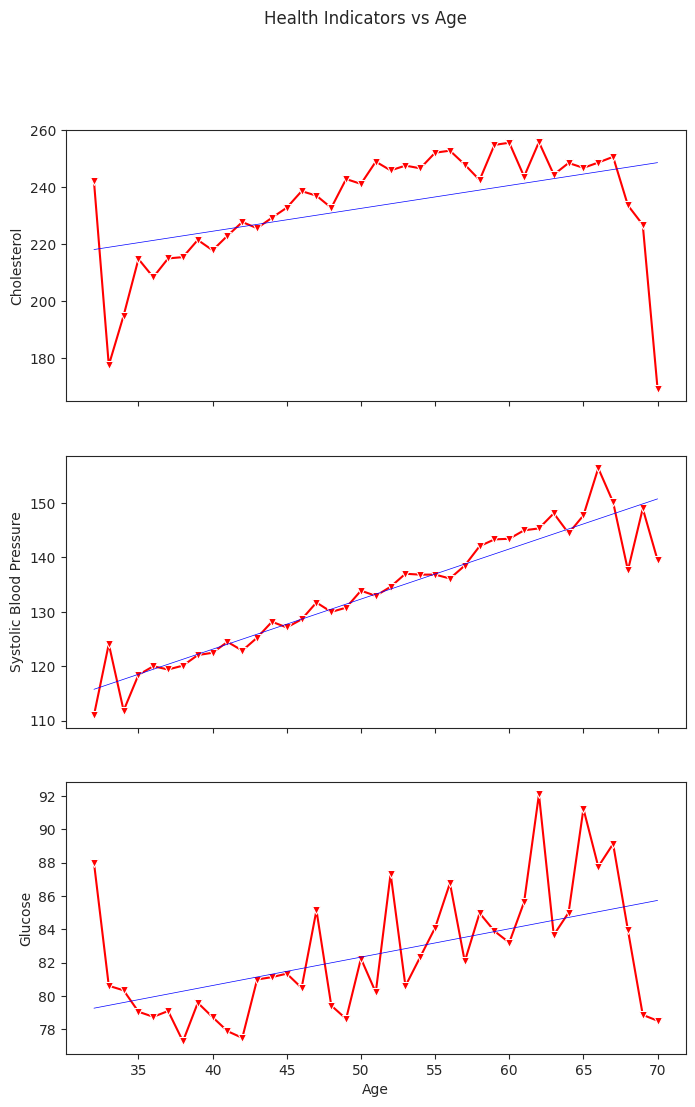

In [104]:
df_1 = df.groupby("age").mean().reset_index()
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8, 12))
fig.suptitle('Health Indicators vs Age')
sns.set_style('ticks')

#Cholesterol
sns.lineplot(ax=axes[0], x='age', y='totChol', data=df_1, errorbar=None, marker='v', color="r")
axes[0].set_ylabel('Cholesterol')
coefficients = np.polyfit(df_1['age'], df_1['totChol'], 1)
line = np.polyval(coefficients, df_1['age'])
axes[0].plot(df_1['age'], line, linestyle='-', color='blue', linewidth=0.5)
axes[0].set_xlabel('Age')

#Heart Rate
sns.lineplot(ax=axes[1], x='age', y='sysBP', data=df_1, errorbar=None, marker='v', color="r")
axes[1].set_ylabel('Systolic Blood Pressure')
coefficients = np.polyfit(df_1['age'], df_1['sysBP'], 1)
line = np.polyval(coefficients, df_1['age'])
axes[1].plot(df_1['age'], line, linestyle='-', color='blue', linewidth=0.5)
axes[1].set_xlabel('Age')

#Glucose
sns.lineplot(ax=axes[2], x='age', y='glucose', data=df_1, errorbar=None, marker='v', color="r")
axes[2].set_ylabel('Glucose')
coefficients = np.polyfit(df_1['age'], df_1['glucose'], 1)
line = np.polyval(coefficients, df_1['age'])
axes[2].plot(df_1['age'], line,linestyle='-', color='blue', linewidth=0.5)
axes[2].set_xlabel('Age')
plt.show()

**Description**

Regarding the 3 graphs elaborated previously, we can state the following conclusions: there is a directly proportional relationship between age and cholesterol levels, in the same way, there is a direct relationship between age and systolic blood pressure levels; also, there is a direct relationship between age and glucose

### **Graph 02: ¿Were Systolic Blood Pressure levels different for people with risk of CHD across ages?**

In [105]:
CHD = df[df["TenYearCHD"]==1] # We have created a DF, that contains just people with CHD equal to 1
No_CHD=df[df["TenYearCHD"]==0] # We have created a DF, that contains just people with CHD equal to 0

output_notebook()
fig = figure(x_axis_label="Age", y_axis_label="Systolic Blood Pressure Level", title="Systolic Blood Pressure vs Age")
CHD_source = ColumnDataSource(data=CHD)
No_CHD_source = ColumnDataSource(data=No_CHD)

CHD_glyph = fig.circle(x="age", y="sysBP", color="blue", size=7, source=CHD_source)
No_CHD_glyph = fig.circle(x="age", y="sysBP", color="green",size=7, source=No_CHD_source)
No_CHD_glyph.visible = False

menu = ["CHD", "No_CHD"]
callback = CustomJS(args=dict(scatter1=CHD_glyph, scatter2=No_CHD_glyph),
                    code="""scatter1.visible = true;
                            scatter2.visible = true;
                            if (this.value == "No_CHD") {
                                scatter1.visible = false;
                            } else {
                                scatter2.visible = false;
                            }""")
menu_select = Select(options=menu, value="CHD", title="Ten Year CHD")
menu_select.js_on_change("value", callback)
layout = column(menu_select, fig)
show(layout)

In [106]:
# Here I calculate the mean of the sysBP variable, for each DF created preciously
print(CHD["sysBP"].mean(),No_CHD["sysBP"].mean())

143.6187888198758 130.33731924360401


**Description**

According to the study, people with a higher SBP are more likely to have risk of CHD, so we would expect that people with a CHD equal to 1 would have higher levels of SBP. The CHD graph shows a positive trend between age and SBP; on the other hand, for the No_CHD graph, the slope still positive but it is reduced. To validate this result, we have calculated the mean for the CHD and No_CHD DataFrames, and it is confirmed that the SBP is higher for the CHD sample.


### **Graph 03 : ¿How did Education levels impact on CHD?**

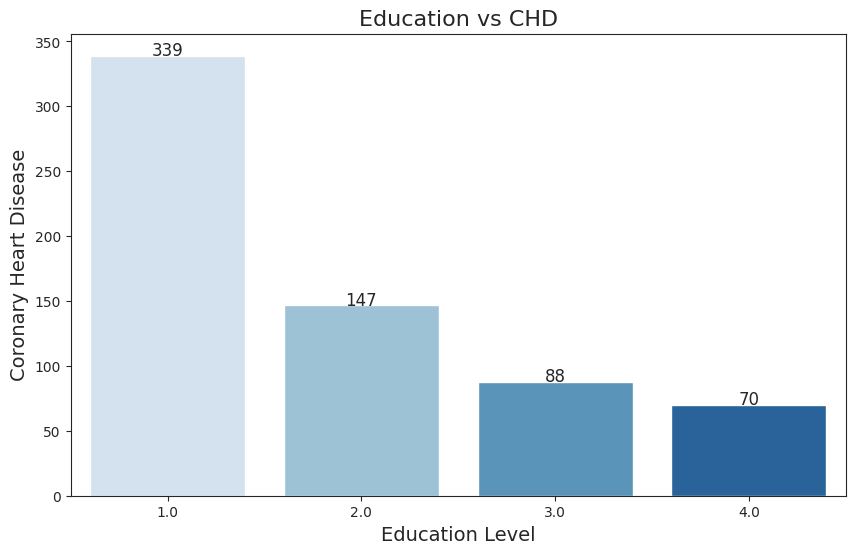

In [107]:
df_2 = df.groupby("education")[["TenYearCHD", "age"]].sum().reset_index() # I used the aggregation function sum, to identify the number of people with higher risk of CHD across the edutacion levels
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Blues", len(df_2))
sns.barplot(x="education", y="TenYearCHD", data=df_2, palette=palette)
plt.xlabel("Education Level", fontsize=14)
plt.ylabel("Coronary Heart Disease", fontsize=14)
plt.title("Education vs CHD", fontsize=16)

for index, value in enumerate(df_2["TenYearCHD"]):
    plt.text(index, value, str(value), ha='center', fontsize=12)

plt.show()

**Description**

The graph suggests an inverse relationship between education levels and the risk of having Coronary Heart Disease (CHD). In other words, people with lower levels of education (1 and 2) are those who are more likely to die from heart stroke. The education levels of 1 and 2 represent people with some high school or with completed high school, a hypothesis that might explain this event is that people with lower levels of education usually have lower salaries, therefore, lower quality of life.


### **Graph 04: ¿How did Systolic Blood Pressure levels behave for people with different levels of education?**

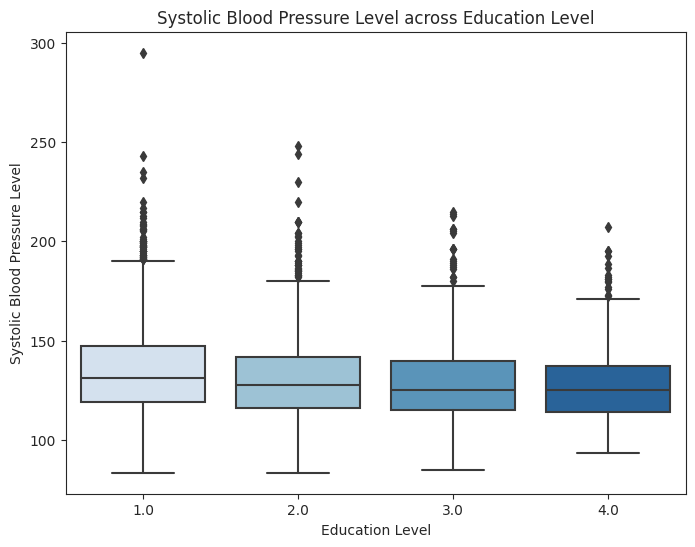

In [108]:
plt.figure(figsize=(8, 6))
palette = sns.color_palette("Blues", len(df_2))
sns.boxplot(x='education', y='sysBP', data=df, palette=palette)
plt.xlabel('Education Level')
plt.ylabel('Systolic Blood Pressure Level')
plt.title('Systolic Blood Pressure Level across Education Level');

In [109]:
df_3 = df.groupby("education").agg(mean_sysBP=('sysBP', np.mean), median_sysBP=('sysBP', np.median)).reset_index()
df_3

,education,mean_sysBP,median_sysBP
0,1.0,135.615068,131.0
1,2.0,130.828013,127.5
2,3.0,129.403483,125.0
3,4.0,128.117336,125.0


**Description**

Complementing Graph 03, this chart establishes that people with less education usually have higher levels of Systolic Blood Pressure. For people with incomplete secondary school (1), the mean is 135.61 and the median is 131 for Systolic Blood Pressure levels; On the other hand, for people who graduated from college (4), the mean is 128.12 and the median is 125


In [110]:
df.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


### **Graph 05: ¿What is the impact of Diabetes on Systolic Blood Pressure levels?**

<ipython-input-111-d4e15f8606e3>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_diabetes["sysBP"], shade=True, color="blue", label="Diabetes")
<ipython-input-111-d4e15f8606e3>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_no_diabetes["sysBP"], shade=True, color="green", label="No Diabetes")


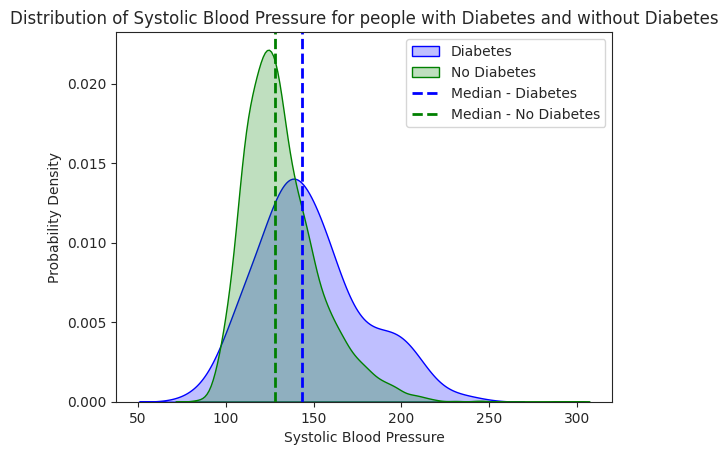

In [111]:
# I created two DataFrames, one for people with Diabetes and the other for people with No Diabetes
df_diabetes = df[df["diabetes"] == 1]
df_no_diabetes = df[df["diabetes"] == 0]

sns.kdeplot(df_diabetes["sysBP"], shade=True, color="blue", label="Diabetes")
sns.kdeplot(df_no_diabetes["sysBP"], shade=True, color="green", label="No Diabetes")

# I calculated the Systolic Blood Pressure median for the Diabetes and No Diabetes DataFrames
median_diabetes = df_diabetes["sysBP"].median()
median_no_diabetes = df_no_diabetes["sysBP"].median()
plt.axvline(median_diabetes, color='blue', linestyle='dashed', linewidth=2, label='Median - Diabetes')
plt.axvline(median_no_diabetes, color='green', linestyle='dashed', linewidth=2, label='Median - No Diabetes')
plt.legend();

plt.xlabel("Systolic Blood Pressure")
plt.ylabel("Probability Density")
plt.title("Distribution of Systolic Blood Pressure for people with Diabetes and without Diabetes");
plt.show();

In [112]:
print(median_diabetes, median_no_diabetes, median_diabetes-median_no_diabetes)

143.5 128.0 15.5


**Description**

Comparing the two distributions and their medians, we conclude that the median systolic blood pressure for people with diabetes is greater than the median for people without diabetes.
Systolic blood pressure for people with diabetes tends to trend or concentrate around 143.5, which may indicate a diabetes-specific influence on systolic blood pressure levels. On the other hand, systolic blood pressure for people without diabetes shows a concentration around
128.0

# **Conclusions**



1.   **Health Indicators and Age:** Cholesterol, systolic blood pressure (SBP) and glucose levels increase with age, suggesting a relationship with aging.
2.   **SBP and CHD Risk:** People with high SBP have a higher risk of coronary heart disease (CHD). An increase in SBP is seen with age, especially in people with CHD.
3. **CHD Education and Risk:** Lower education (levels 1 and 2) is associated with higher risk of CHD, possibly due to lower income and lower quality of life.
4. **Education and SBP:** Less educated people tend to have higher SBP, indicating possible health disparities related to educational level.
5. **Impact of Diabetes on SBP:** The median SBP for people with diabetes is higher than for people without diabetes, pointing to a specific influence of diabetes on SBP.